In [1]:
import tweepy

CONSUMER_KEY = 'Vs5g2S071o0cd35MGfPhpYjlr'
CONSUMER_SECRET = 't6iDJlG2iMSYPBcrSeISdHa1GwtRFHUaAaJZw8dXGaAvQ1akHT'
OAUTH_TOKEN = '1152931068347113472-IINuFzCHk0P86WoBsQgQSVPgiU6dWK'
OAUTH_TOKEN_SECRET = 'mnQ5qnHeVzSTInDMi7o4aWwQB3zRzPpq1XbqAhaGAtqqF'

##### Connecxion à l'API
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

#  Token and secret
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

# Création de l'API
api = tweepy.API(auth) 

# # Afficher l'objet twitter API

api

In [1]:
from pymongo import MongoClient
client = MongoClient("mongodb://127.0.0.1:27017")

mydb = client["Twitter"]

mycol = mydb["Toxicity"]

#x = mycol.delete_many({})

In [3]:
from detoxify import Detoxify
detoxifier = Detoxify('original')

In [6]:
def scrape(words,since, numtweet):
 
        tweets = tweepy.Cursor(api.search, words,since=since, lang="fr",tweet_mode='extended').items(numtweet)
 
        list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
        i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                hashtags = tweet.entities['hashtags']
                description = tweet.user.description
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
                        
                print('text', text)
                #print('description', description)
                toxicity = str(detoxifier.predict(str(text))['toxicity'])
                #print(toxicity)
                # Here we are appending all the extracted information in the database
                ith_tweet = {'text':text,'toxicity':toxicity}

                x = mycol.insert_one(ith_tweet)
            

In [7]:
numtweet = 1000
since = '2000-01-01'
words = 'harcelement'
scrape(words,since, numtweet)

text LE SYSTEME SOS RACISME:

Détournement de fonds sociaux et publics, abus de confiance, escroquerie, séquestration, harcèlement moral, recel d’abus de confiance et vol...

https://t.co/Z1xplexLy6

#SOSRacisme #SOSOuinOuin https://t.co/yTb4BhjVGH
text @CedLeDouDou @Readthekay 😂😂😂😂 ça s'appelle du harcèlement chez les blancs , mais nan je fais très peu de selfies , j'ai une barbe poivre-sel , c'est pas sexy
text Les escrocs voleur qui vous appelle et vous raccroche au nez pour que vous les rappeler 0518070150 Ping coll phishing 05 18 07 01 50 #escro #voleur #harcelement #COVID19 #Harcèlementtéléphonique #pub #EricDupondMoretti #CollCenter #center #innovation 🤬🚨☎️⚖️⚰️👾🎊💳💸💩 https://t.co/AXGBpVrhAY
text #MileApo Short AU 
~
“harcèlement et vengeance”
~ https://t.co/ScfEDIXmd2
text Minamino att je rentre j’suis ko la mais j’ai jurer tu va subir du harcèlement de ma par sale escroquerie de mersey
text LE SYSTEME SOS RACISME:

Détournement de fonds sociaux et publics, abus de confiance, esc

In [2]:
collection = mydb['Toxicity']

In [3]:
total_count = collection.count_documents({})
total_count

1067

In [4]:
tweets = []
toxic = []
for document in collection.find():
    tweets.append(document['text'])
    toxic.append(document['toxicity'])

In [5]:
import pandas as pd
from nltk.tokenize import word_tokenize


df = pd.DataFrame({'Tweet':tweets,'Toxicity':toxic})

df.head()

/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details

,Tweet,Toxicity
0,Minamino att je rentre j’suis ko la mais j’ai ...,0.18515185
1,LE SYSTEME SOS RACISME:\n\nDétournement de fon...,0.010910908
2,@sixbaddix @jaigravelahaine D'après certaines ...,0.0068921507
3,Procès en appel dans la première affaire #MeTo...,0.008419436
4,@KHALpsg @GabiRed7 @DeadlineDayLive @mundodepo...,0.10073182


#Nettoyage des donnèes

In [6]:
import re

def cleaning(x):
    #On remplace les liens par des espaces
    x = " ".join(re.sub("(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)", "", x).split())
    #On remplace les retours de chariots par des espaces
    x = x.replace('\\n', ' ')
   #On enlev les emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    x = emoji_pattern.sub(r'', x)
     #On enleve les pseudo des utilisateurs dans les tweets et on met le text en minuscule
    tokens = x.split()
    tokens = [i.lower() for i in tokens if '@' not in i]
    return " ".join(tokens)

In [7]:
df["Clean tweet"] = df.Tweet.apply(cleaning)

In [8]:
df

,Tweet,Toxicity,Clean tweet
0,Minamino att je rentre j’suis ko la mais j’ai ...,0.18515185,minamino att je rentre j’suis ko la mais j’ai ...
1,LE SYSTEME SOS RACISME:\n\nDétournement de fon...,0.010910908,le systeme sos racisme: détournement de fonds ...
2,@sixbaddix @jaigravelahaine D'après certaines ...,0.0068921507,d'après certaines personnes de sa commu oui. a...
3,Procès en appel dans la première affaire #MeTo...,0.008419436,procès en appel dans la première affaire #meto...
4,@KHALpsg @GabiRed7 @DeadlineDayLive @mundodepo...,0.10073182,ta boîte te verse pas ton salaire et du coup t...
...,...,...,...
1062,@3leyyynaa Le harcèlement de malade hahaha,0.08609706,le harcèlement de malade hahaha
1063,@Kammeto c’est ça votre investissement contre ...,0.023175823,c’est ça votre investissement contre le harcèl...
1064,"Selon ⁦@francoislegault⁩, la victime serait do...",0.0057296488,selon la victime serait donc une menteuse?
1065,Autre plainte pour harcèlement psychologique c...,0.0052084588,autre plainte pour harcèlement psychologique c...


In [69]:
import collections
import itertools

#corpus = df['Clean tweet'].str.cat()
corpus = list(df['Clean tweet'].apply(lambda x: x.split()))

all_words = list(itertools.chain(*corpus))

# Compte des mots
counts = collections.Counter(all_words)

counts.most_common(40)

[('de', 1358),
 ('la', 740),
 ('et', 720),
 ('le', 713),
 ('harcèlement', 658),
 ('à', 484),
 ('les', 463),
 ('en', 445),
 ('des', 405),
 ('une', 392),
 ('pour', 366),
 ('que', 351),
 ('un', 317),
 ('a', 289),
 ('qui', 284),
 ('il', 275),
 ('du', 264),
 ('est', 264),
 ('sur', 251),
 ('pas', 229),
 ('je', 223),
 (':', 222),
 ('dans', 204),
 ('au', 189),
 ('vous', 181),
 ('ans', 176),
 ('ce', 173),
 ('elle', 173),
 ('plainte', 159),
 ('»', 152),
 ('c’est', 144),
 ('«', 142),
 ('par', 141),
 ('son', 136),
 ('-', 135),
 ('cette', 133),
 ('contre', 124),
 ("c'est", 120),
 ('on', 120),
 ('tu', 119)]

In [70]:
#On enleve les stopwords

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasirene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['Clean tweet sans sw'] = df['Clean tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [11]:
def normalize(x):
    if float(x)> 0.1:
        return 1
    return 0

In [12]:
df['score'] = df.Toxicity.apply(normalize)

In [13]:
df.head()

,Tweet,Toxicity,Clean tweet,Clean tweet sans sw,score
0,Minamino att je rentre j’suis ko la mais j’ai ...,0.18515185,minamino att je rentre j’suis ko la mais j’ai ...,minamino att rentre j’suis ko j’ai jurer va su...,1
1,LE SYSTEME SOS RACISME:\n\nDétournement de fon...,0.010910908,le systeme sos racisme: détournement de fonds ...,systeme sos racisme: détournement fonds sociau...,0
2,@sixbaddix @jaigravelahaine D'après certaines ...,0.0068921507,d'après certaines personnes de sa commu oui. a...,d'après certaines personnes commu oui. après d...,0
3,Procès en appel dans la première affaire #MeTo...,0.008419436,procès en appel dans la première affaire #meto...,procès appel première affaire #metoo chine: pr...,0
4,@KHALpsg @GabiRed7 @DeadlineDayLive @mundodepo...,0.10073182,ta boîte te verse pas ton salaire et du coup t...,boîte verse salaire coup dis rien ? c'est harc...,1


In [92]:
df.score.value_counts()

0    920
1    147
Name: score, dtype: int64

Le dataset est désquilibré

In [72]:
tweet_sans_sw = [[mots for mots in mots_tweet if not mots in stop_words]
                 for mots_tweet in corpus]

In [73]:
ens_mot_sans_sw = list(itertools.chain(*tweet_sans_sw))
compte_tw_no_sw = collections.Counter(ens_mot_sans_sw)
compte_tw_no_sw.most_common(40)

[('harcèlement', 658),
 ('a', 289),
 (':', 222),
 ('ans', 176),
 ('plainte', 159),
 ('»', 152),
 ('c’est', 144),
 ('«', 142),
 ('-', 135),
 ('cette', 133),
 ('contre', 124),
 ("c'est", 120),
 ('ça', 118),
 ('legault', 113),
 ('police', 108),
 ('confiance', 107),
 ('plus', 107),
 ('fait', 106),
 ('nouvelle', 104),
 ('?', 103),
 ('mystère', 102),
 ('municipale', 99),
 ('!', 97),
 ('pourquoi', 91),
 ('marie-ève', 90),
 ('://', 88),
 ('tout', 87),
 ('faire', 86),
 ('autre', 85),
 ('psychologique', 84),
 ('mot', 83),
 ('dire', 80),
 ('j’ai', 78),
 ('politique', 72),
 ('alors', 71),
 ('va', 70),
 ('encore', 70),
 ("s'est", 67),
 ("qu'il", 67),
 ('2021', 66)]

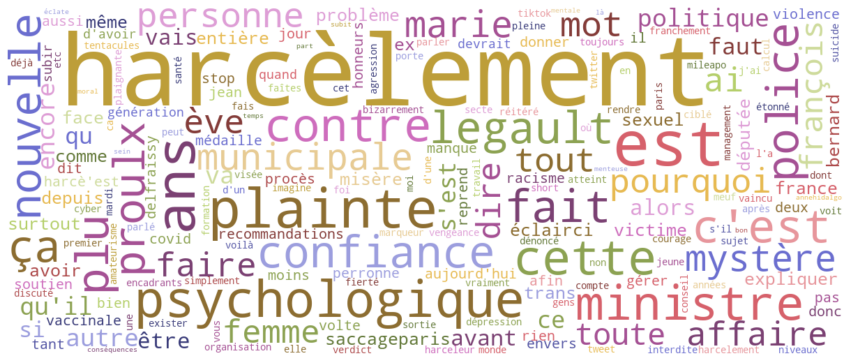

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Clean tweet sans sw'].str.cat()

#wordcloud = WordCloud(width=600, height=600,background_color="skyblue", margin=0).generate(text)

wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df['Clean tweet sans sw']).toarray()
features.shape

(1067, 1255)

In [93]:
labels = df.score

On commence par MultinomialNB c'est le model qui convient le mieux au comptage des mots

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(df['Clean tweet sans sw'], df['score'], random_state = 0)

preprocessing = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])
  
print("Preprocessing training data...")
train_preprocessed = preprocessing.fit_transform(X_train)

print("Preprocessing test data...")
test_preprocessed = preprocessing.transform(X_test)

Preprocessing training data...
Preprocessing test data...


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

nb_classifier = MultinomialNB()
svm_classifier = LinearSVC()
lr_classifier = LogisticRegression(multi_class="ovr")

print("Training Naive Bayes classifier...")
nb_classifier.fit(train_preprocessed, y_train)

print("Training SVM classifier...")
svm_classifier.fit(train_preprocessed, y_train)

print("Training Logistic Regression classifier...")
lr_classifier.fit(train_preprocessed, y_train)

Training Naive Bayes classifier...
Training SVM classifier...
Training Logistic Regression classifier...


/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
nb_predictions = nb_classifier.predict(test_preprocessed)
svm_predictions = svm_classifier.predict(test_preprocessed)
lr_predictions = lr_classifier.predict(test_preprocessed)

/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wis

In [23]:
import numpy as np

print("NB Accuracy:", np.mean(nb_predictions == y_test))
print("SVM Accuracy:", np.mean(svm_predictions == y_test))
print("LR Accuracy:", np.mean(lr_predictions == y_test))

NB Accuracy: 0.9176029962546817
SVM Accuracy: 0.9363295880149812
LR Accuracy: 0.9101123595505618


In [24]:
toxicity_classifier = Pipeline(steps=[
                               ('vect', CountVectorizer()),
                               ('tfidf', TfidfTransformer()),
                               ('SVM',LinearSVC())])
# train the sentiment classifier 
toxicity_classifier.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('SVM',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [25]:
# test model performance on valid data 
y_preds = toxicity_classifier.predict(X_test)

/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [26]:
print("SVM Accuracy:", np.mean(y_preds == y_test))

SVM Accuracy: 0.9363295880149812


In [27]:
#save model 
import joblib 
joblib.dump(toxicity_classifier, 'models/toxicity_classifier_pipeline.pkl')

['models/toxicity_classifier_pipeline.pkl']

In [116]:
#save model 
import joblib 
joblib.dump(svm_classifier, 'models/toxicity_model.pkl')

['models/toxicity_model.pkl']

In [28]:
import joblib 
with open("models/toxicity_classifier_pipeline.pkl", "rb" ) as f:
    model = joblib.load(f)

In [30]:
pred = model.predict(X_test)
np.mean(pred == y_test)

/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.9363295880149812

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting i

In [100]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.915888
1,RandomForestClassifier,1,0.920561
2,RandomForestClassifier,2,0.901408
3,RandomForestClassifier,3,0.906103
4,RandomForestClassifier,4,0.915493
5,LinearSVC,0,0.925234
6,LinearSVC,1,0.934579
7,LinearSVC,2,0.910798
8,LinearSVC,3,0.906103
9,LinearSVC,4,0.892019


Random Forest
<li>Fonctionne bien avec les données non linéaires.</li>
<li>Faible risque d'overfitting.</li>
<li>Fonctionne efficacement sur un grand ensemble de données.</li> <br>
LinearSVM


In [101]:
#random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
clf.fit(X_train, y_train)